In [5]:
import fastf1 as fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

import fastf1.plotting


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
session = fastf1.get_session(2023, 'Belgium Grand Prix', 'Q')
session.load()

core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.0.0]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '44', '55', '81', '4', '63', '14', '18', '22', '10', '20', '77', '31', '23', '24', '2', '3', '27']


In [7]:
# select drivers to compare
ver_lap = session.laps.pick_driver('VER').pick_fastest()
lec_lap = session.laps.pick_driver('LEC').pick_fastest()

# telemetry data
ver_tel = ver_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()



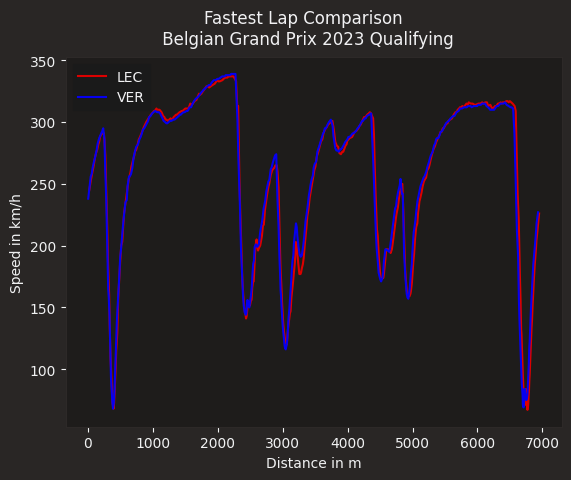

In [ ]:
# plotting data
rbr_color = fastf1.plotting.team_color('RBR')
fer_color = fastf1.plotting.team_color('FER')

fig, ax = plt.subplots()


ax.plot(lec_tel['Distance'], lec_tel['Speed'], color=fer_color, label='LEC')
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()